## <span style='font-family:"Times New Roman"'>Data insight

In [3]:
# Standard libraries used:
import pandas as pd
import numpy as np
import re
import emoji

# sklearn libraries used:
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer

# Seaborn & mathplot libraries used:
from seaborn import pairplot
import matplotlib.pyplot as plt

## <span style='font-family:"Times New Roman"'>Downloading datasets

In [8]:
"""Loading data-sets"""
df_train = pd.read_csv("https://www.dropbox.com/s/6gr5t05rd7v3nwm/dalc_v1_train_text.csv?dl=1")
df_dev = pd.read_csv("https://www.dropbox.com/s/mf2gyanb2pbz51a/dalc_v1_dev_text.csv?dl=1")
df_test = pd.read_csv("https://www.dropbox.com/s/ngotr4fyhjl9i2f/dalc_v1_test_text.csv?dl=1")
df_gold = pd.read_csv("https://www.dropbox.com/s/renwwgci14rs97z/df_gold.csv?dl=1")

In [9]:
"""Removing columns that aren't used"""
df_train = df_train.drop(columns=['Id', 'Target'])
df_dev = df_dev.drop(columns=['Id', 'Target'])
df_test = df_test.drop(columns=['Id', 'Target'])

In [23]:
df_train.shape

(5706, 2)

In [24]:
df_train.head()

,Text,Explicitness
0,a1 limburgsingel arnhem 6845DS 79898 | Ambulan...,NOT
1,Schijnt trouwens dat er in België ook verdacht...,NOT
2,@USER Zo lijkt het bij sommige mensen écht hé?,NOT
3,Vannacht is deze trailer gestolen van het terr...,NOT
4,"@USER ik geen eeuwige grafrust, die lui ook ni...",NOT


In [25]:
df_dev.shape

(549, 2)

In [26]:
df_dev.head()

,Text,Explicitness
0,"@USER @USER Verder al veldwerk dat WBE's doen,...",NOT
1,@USER Het extreem linkse CNN wordt belaagd doo...,NOT
2,@USER @USER en eindeloze hoeveelheden papiersc...,NOT
3,@USER @USER @USER @USER Ik denk dat de grootst...,NOT
4,"Als je ""protesteert"" tegen politiegeweld en da...",NOT


In [27]:
df_test.shape

(1901, 2)

In [28]:
df_test.head()

,Text,Explicitness
0,@USER Oei...krijgen we toch een nieuwe ijstijd...,NOT
1,01-06-18 19 :51: 21 1324061 Oproep OVD : TI we...,NOT
2,Wat een superleuk idee deze boekenleggers! URL,NOT
3,@USER @USER @USER @USER @USER @USER @USER @USE...,NOT
4,Inspecteur mag bewijsstukken kosten verbouwing...,NOT


In [29]:
df_gold.shape

(999, 2)

In [30]:
df_gold.head()

,Text,Explicitness
0,"#eventothier Grote smurf, Mark Rutte met zijn ...",IMPLICIT
1,@geertwilderspvv @telegraaf Ik heb de debatten...,IMPLICIT
2,@thierrybaudet Want? Welk feit klopt er niet?,NOT
3,@CoronaAanval @pwrdbyanthony @WybrenvanHaga @f...,EXPLICIT
4,@Odessa666666 @ChrRoland @PartijvdDieren @esth...,NOT


## <span style='font-family:"Times New Roman"'>Distribution of the DALC dataset

In [31]:
"""DALC total train tweets"""
target_labels_train = df_train['Explicitness']
len(target_labels_train)

5706

In [32]:
"""DALC total evaluation tweets"""
target_labels_dev = df_dev['Explicitness']
len(target_labels_dev)

549

In [33]:
"""DALC total test tweets"""
target_labels_test = df_test['Explicitness']
len(target_labels_test)

1901

In [34]:
"""Gold test set total tweets"""
gold_test_labels = df_gold['Explicitness']
len(gold_test_labels)

999

In [35]:
"""Distribution of the DALC dataset into train, dev, test"""
total = len(target_labels_train) + len(target_labels_dev) + len(target_labels_test)
print('Percentage train:', (len(target_labels_train) / total) * 100)
print('Percentage dev:', (len(target_labels_dev) / total) * 100)
print('Percentage test:', (len(target_labels_test) / total)* 100)

Percentage train: 69.96076508092202
Percentage dev: 6.731240804315841
Percentage test: 23.30799411476214


## <span style='font-family:"Times New Roman"'>Pie charts 

In [10]:
train_exp = df_train['Explicitness'].value_counts()
dev_exp = df_dev['Explicitness'].value_counts()
test_exp = df_test['Explicitness'].value_counts()
gold_exp = df_gold['Explicitness'].value_counts()

print("DALC train\n Label:   Total:\n explicit {}\n implicit {}\n not\t  {}\n".format(train_exp[0], train_exp[1], train_exp[2]))
print("DALC dev\n Label:   Total:\n explicit {}\n implicit {}\n not\t  {}\n".format(dev_exp[0], dev_exp[1], dev_exp[2]))
print("DALC test\n Label:   Total:\n explicit {}\n implicit {}\n not\t  {}\n".format(test_exp[0], test_exp[1], test_exp[2]))
print("GOLD\n Label:   Total:\n explicit {}\n implicit {}\n not\t  {}\n".format(gold_exp[0], gold_exp[1], gold_exp[2]))

DALC train
 Label:   Total:
 explicit 4564
 implicit 699
 not	  443

DALC dev
 Label:   Total:
 explicit 439
 implicit 72
 not	  38

DALC test
 Label:   Total:
 explicit 1264
 implicit 458
 not	  179

GOLD
 Label:   Total:
 explicit 697
 implicit 178
 not	  124



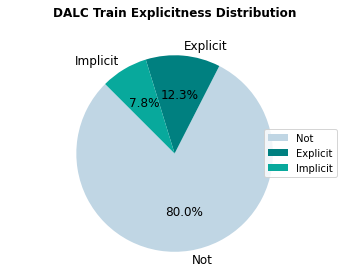

In [11]:
"""Plotting pie chart for df_train set"""
fig1 = plt.figure()
mylabels = ["Not", "Explicit", "Implicit"]
myexplode = [0, 0, 0]
mycolors = ["#C0D6E4", "#008080", "#08a99c"]
plt.pie(df_train['Explicitness'].value_counts(), labels=mylabels, startangle=135, 
        explode=myexplode, colors=mycolors, autopct='%1.1f%%', textprops={'size': 'larger'})
plt.title('DALC Train Explicitness Distribution', y=1.1, fontweight='bold')
plt.legend(loc="center right")
plt.axis('equal')
plt.show() 
fig1.savefig('dalc_train.png', bbox_inches='tight')

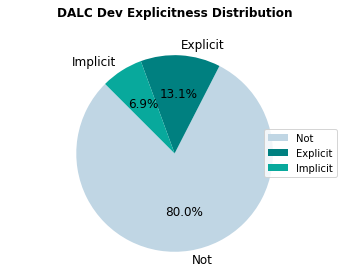

In [12]:
"""Plotting pie chart for df_dev set"""
fig2 = plt.figure()
mylabels = ["Not", "Explicit", "Implicit"]
myexplode = [0, 0, 0]
mycolors = ["#C0D6E4", "#008080", "#08a99c"]
plt.pie(df_dev['Explicitness'].value_counts(), labels = mylabels, startangle=135, 
        explode=myexplode, colors=mycolors, autopct='%1.1f%%', textprops={'size': 'larger'})
plt.title('DALC Dev Explicitness Distribution', y=1.1, fontweight='bold')
plt.legend(loc="center right")
plt.axis('equal')
plt.show()
fig2.savefig('dalc_dev.png', bbox_inches='tight')

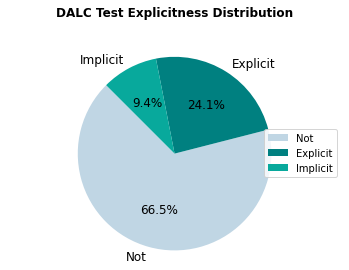

In [13]:
"""Plotting pie chart for df_test set"""
fig3 = plt.figure()
mylabels = ["Not", "Explicit", "Implicit"]
myexplode = [0, 0, 0]
mycolors = ["#C0D6E4", "#008080", "#08a99c"]
plt.pie(df_test['Explicitness'].value_counts(), labels = mylabels, startangle=135, 
        explode=myexplode, colors=mycolors, autopct='%1.1f%%', textprops={'size': 'larger'})
plt.title('DALC Test Explicitness Distribution', y=1.1, fontweight='bold')
plt.legend(loc="center right")
plt.axis('equal')
plt.show()
fig3.savefig('dalc_test.png', bbox_inches='tight')

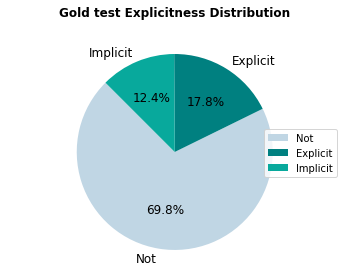

In [14]:
"""Plotting pie chart for df_gold test set"""
fig4 = plt.figure()
mylabels = ["Not", "Explicit", "Implicit"]
myexplode = [0, 0, 0]
mycolors = ["#C0D6E4", "#008080", "#08a99c"]
plt.pie(df_gold['Explicitness'].value_counts(), labels = mylabels, startangle=135, 
        explode=myexplode, colors=mycolors, autopct='%1.1f%%', textprops={'size': 'larger'})
plt.title('Gold test Explicitness Distribution', y=1.1, fontweight='bold')
plt.legend(loc="center right")
plt.axis('equal')
plt.show()
fig4.savefig('gold_test.png', bbox_inches='tight')

## <span style='font-family:"Times New Roman"'>Feature examples

In [7]:
text = "It is a beautiful day"
text2 = "It is a rainy day"

tfidf = TfidfVectorizer(analyzer='word', ngram_range=(2,2))
tfidf.fit([text, text2])
x = tfidf.transform([text]).toarray()
y = tfidf.transform([text2]).toarray()
columns = tfidf.get_feature_names()
df1 = pd.DataFrame(x, columns=columns, index= ["Text1:"])
df2 = pd.DataFrame(y, columns=columns, index= ["Text2:"])
df = pd.concat([df1,df2])
#df